In [1]:
import torch
import gc

gc.collect()
torch.cuda.empty_cache()

In [2]:
import os
import json
from PIL import Image

import numpy as np
import pandas as pd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import seaborn as sns

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
kaggle_key = json.load(open("kaggle.json"))

In [4]:
os.environ["KAGGLE_USERNAME"] = kaggle_key["username"]
os.environ["KAGGLE_KEY"] = kaggle_key["key"]

In [5]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.03G/2.04G [00:16<00:00, 66.0MB/s]
100% 2.04G/2.04G [00:16<00:00, 132MB/s] 


In [6]:
import zipfile
with zipfile.ZipFile("/content/plantvillage-dataset.zip","r") as f:
  f.extractall()

array([[[143, 139, 172],
        [145, 141, 174],
        [147, 143, 176],
        ...,
        [145, 141, 174],
        [145, 141, 174],
        [145, 141, 174]],

       [[145, 141, 174],
        [147, 143, 176],
        [149, 145, 178],
        ...,
        [145, 141, 174],
        [145, 141, 174],
        [145, 141, 174]],

       [[148, 144, 177],
        [149, 145, 178],
        [151, 147, 180],
        ...,
        [145, 141, 174],
        [145, 141, 174],
        [145, 141, 174]],

       ...,

       [[ 51,  50,  56],
        [ 72,  71,  79],
        [ 78,  76,  89],
        ...,
        [ 91,  82, 113],
        [ 92,  83, 114],
        [ 93,  84, 115]],

       [[ 46,  46,  48],
        [ 58,  57,  62],
        [ 65,  64,  72],
        ...,
        [ 91,  82, 113],
        [ 91,  82, 113],
        [ 91,  82, 113]],

       [[ 55,  55,  55],
        [ 54,  54,  56],
        [ 57,  56,  62],
        ...,
        [ 90,  81, 112],
        [ 89,  80, 111],
        [ 89,  80, 111]]], dtype=uint8)
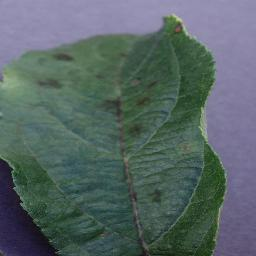

In [7]:
image_path = "/content/plantvillage dataset/color/Apple___Apple_scab/023123cb-7b69-4c9f-a521-766d7c8543bb___FREC_Scab 3487.JPG"
plt.imread(image_path)

In [8]:
a = mpimg.imread("/content/plantvillage dataset/grayscale/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG")
print(a)

[[[167 167 167]
  [166 166 166]
  [165 165 165]
  ...
  [186 186 186]
  [184 184 184]
  [182 182 182]]

 [[170 170 170]
  [169 169 169]
  [168 168 168]
  ...
  [187 187 187]
  [185 185 185]
  [184 184 184]]

 [[170 170 170]
  [169 169 169]
  [168 168 168]
  ...
  [189 189 189]
  [187 187 187]
  [186 186 186]]

 ...

 [[ 96  96  96]
  [ 98  98  98]
  [100 100 100]
  ...
  [117 117 117]
  [117 117 117]
  [117 117 117]]

 [[ 97  97  97]
  [ 98  98  98]
  [ 99  99  99]
  ...
  [113 113 113]
  [114 114 114]
  [114 114 114]]

 [[100 100 100]
  [ 99  99  99]
  [ 98  98  98]
  ...
  [112 112 112]
  [113 113 113]
  [114 114 114]]]


In [9]:
import os
color = os.listdir("/content/plantvillage dataset/color")
len(color)

38

In [10]:
base_dir = "/content/plantvillage dataset/color"


# Data Augmentation

In [11]:
data_gen = ImageDataGenerator(
    rescale=1./255,           # 1. mean to give out put in floating poing -- it normalize the imag pixel between [0,1]
    validation_split=0.2
)

In [12]:
train_data = data_gen.flow_from_directory(
    base_dir,
    batch_size=32,
    target_size=(256,256),
    subset="training",
    class_mode = "categorical"
)

Found 43456 images belonging to 38 classes.


In [13]:
train_data.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

loss=**categorical_crossentropy**  -->if labels are one-hot encoded


loss=**sparse_categorical_crossentropy** --> if labels are integers (not one-hot)


In [14]:
validation_gen = data_gen.flow_from_directory(
    base_dir,
    target_size=(256,256),
    batch_size=32,
    subset = "validation",
    class_mode= "categorical"

)

Found 10849 images belonging to 38 classes.


# CNN

In [15]:

from tensorflow.keras.layers import Dense,MaxPooling2D,Flatten,Dense,Conv2D,BatchNormalization,Dropout,Activation,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(32,(3,3),padding="same",use_bias=False,input_shape=(256,256,3)))  # use_bias=False since BatchNorm has offset parameters.
model.add(MaxPooling2D(2,2))  # default stride for maxpooling is (2,2)
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),use_bias=False,padding="same"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),use_bias=False,padding="same"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))


model.add(Flatten())           # Converts 2D feature maps (H×W×C) into a 1D vector (H×W×C → HWC)  # for custom cnn this is better
# model.add(GlobalAveragePooling2D()) #  Reduce overfitting    Computes the average of each feature map (Height×Width×Channel → C)   for pretrained cnn this is better

model.add(Dense(256,use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

model.add(Dense(train_data.num_classes,activation="softmax"))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    33,554,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,659,142 (128.40 MB)

 Trainable params: 33,658,182 (128.40 MB)

 Non-trainable params: 960 (3.75 KB)

In [16]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


early_stop = EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=4,
    mode= "auto"
)

checkpoint = ModelCheckpoint(
    "cnn.h5",
     monitor="val_loss",
    save_best_only=True,
    mode="min"
)


In [18]:
history = model.fit(train_data,validation_data=validation_gen,epochs=10,callbacks=[checkpoint,early_stop])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7030 - loss: 1.0848

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 134s 89ms/step - accuracy: 0.7031 - loss: 1.0845 - val_accuracy: 0.7652 - val_loss: 0.7408
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9257 - loss: 0.2402

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 126s 92ms/step - accuracy: 0.9257 - loss: 0.2402 - val_accuracy: 0.8832 - val_loss: 0.3531
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9636 - loss: 0.1241

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 121s 89ms/step - accuracy: 0.9636 - loss: 0.1241 - val_accuracy: 0.8948 - val_loss: 0.3270
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 117s 86ms/step - accuracy: 0.9741 - loss: 0.0849 - val_accuracy: 0.8423 - val_loss: 0.5177
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9800 - loss: 0.0629

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 123s 90ms/step - accuracy: 0.9800 - loss: 0.0629 - val_accuracy: 0.9077 - val_loss: 0.3101
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9819 - loss: 0.0558

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 125s 92ms/step - accuracy: 0.9819 - loss: 0.0558 - val_accuracy: 0.9184 - val_loss: 0.2974
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 113s 83ms/step - accuracy: 0.9858 - loss: 0.0442 - val_accuracy: 0.7207 - val_loss: 1.5031
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9872 - loss: 0.0385

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 125s 92ms/step - accuracy: 0.9872 - loss: 0.0385 - val_accuracy: 0.9181 - val_loss: 0.2558
Epoch 9/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 113s 83ms/step - accuracy: 0.9894 - loss: 0.0339 - val_accuracy: 0.9042 - val_loss: 0.3397
Epoch 10/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9893 - loss: 0.0302

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 122s 90ms/step - accuracy: 0.9893 - loss: 0.0302 - val_accuracy: 0.9440 - val_loss: 0.1903


Text(0, 0.5, 'Epochs')

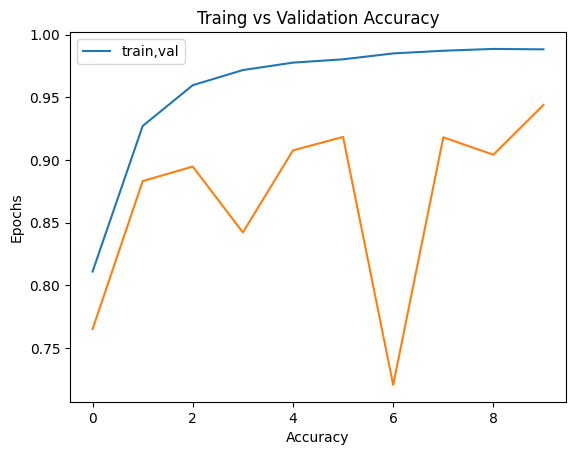

In [19]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Traing vs Validation Accuracy")
plt.legend(["train,val"])
plt.xlabel("Accuracy")
plt.ylabel("Epochs")

Text(0, 0.5, 'Epochs')

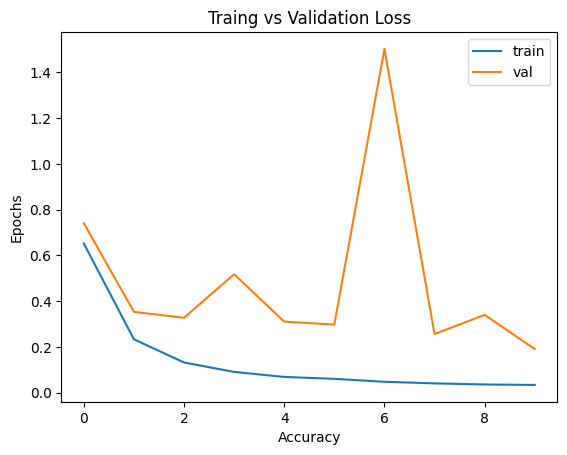

In [20]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Traing vs Validation Loss")
plt.legend(["train","val"])
plt.xlabel("Accuracy")
plt.ylabel("Epochs")

In [21]:
from PIL import Image
import numpy as np

def load_image(image):
    img = Image.open(image)
    img = img.resize((256, 256), Image.Resampling.LANCZOS)
    img_arr = np.array(img).astype("float32") / 255.0
    img_arr = np.expand_dims(img_arr, axis=0)   #axis=0  for batches
    return img_arr

def prediction(model, image_path, class_indices):
    img = load_image(image_path)
    pred = model.predict(img)
    max_prob = np.argmax(pred, axis=1)[0]
    class_of_pred = class_indices[max_prob]
    return class_of_pred

# Mapping numeric index back to class name
class_indices = {v: k for k, v in train_data.class_indices.items()}

# Test image
input_image = "/content/plantvillage dataset/color/Peach___healthy/026aa11e-3f67-4951-9533-3c6ceb4c3d59___Rutg._HL 2494.JPG"
result = prediction(model, input_image, class_indices)
print("Predicted class:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
Predicted class: Peach___healthy


In [22]:
!zip "cnn_custom.zip" cnn.h5

  adding: cnn.h5 (deflated 8%)


# ReseNet

**resnet.output**:

This shows the output tensor from the final layer of the model

``resnet.output has CNN layers (Convolutional layers), not Dense layers when you use include_top=False.``





In [23]:
from tensorflow.keras.applications import ResNet50

resnet = ResNet50(
    include_top=False,          # Don't include the final (1000-class) dense layer
    weights='imagenet',         # Use pretrained weights on ImageNet
    input_shape=(256, 256, 3)   # Match the target size from your data generator
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
resnet.trainable=False    # or freeze all layer

In [37]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# FUnctional API

x=resnet.output

x=Flatten()(x)

x= Dense(256)(x)
x = BatchNormalization()(x)
x= Dropout(0.2)(x)
x = Activation("relu")(x)



output = Dense(train_data.num_classes,activation="softmax")(x)


model = Model(inputs = resnet.input,outputs = output)   # resnet input = CNN layer   and output = Our custom Lsyers

model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 57,153,190 (218.02 MB)

 Trainable params: 33,564,966 (128.04 MB)

 Non-trainable params: 23,588,224 (89.98 MB)

In [38]:
model.compile(loss="categorical_crossentropy",optimizer=Adam(learning_rate=0.0001),metrics=["accuracy"])

In [39]:
model.fit(train_data,validation_data = validation_gen,epochs=7,callbacks=[checkpoint,early_stop])

Epoch 1/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 197s 137ms/step - accuracy: 0.5780 - loss: 1.6169 - val_accuracy: 0.4329 - val_loss: 2.8917
Epoch 2/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 178s 131ms/step - accuracy: 0.7852 - loss: 0.7951 - val_accuracy: 0.3945 - val_loss: 2.5941
Epoch 3/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 186s 137ms/step - accuracy: 0.8302 - loss: 0.6142 - val_accuracy: 0.3816 - val_loss: 3.1794
Epoch 4/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 179s 132ms/step - accuracy: 0.8595 - loss: 0.4982 - val_accuracy: 0.3207 - val_loss: 2.8630
Epoch 5/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 178s 131ms/step - accuracy: 0.8772 - loss: 0.4332 - val_accuracy: 0.3598 - val_loss: 3.0252
Epoch 6/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 186s 137ms/step - accuracy: 0.8900 - loss: 0.3766 - val_accuracy: 0.4100 - val_loss: 3.8510


Text(0, 0.5, 'Epochs')

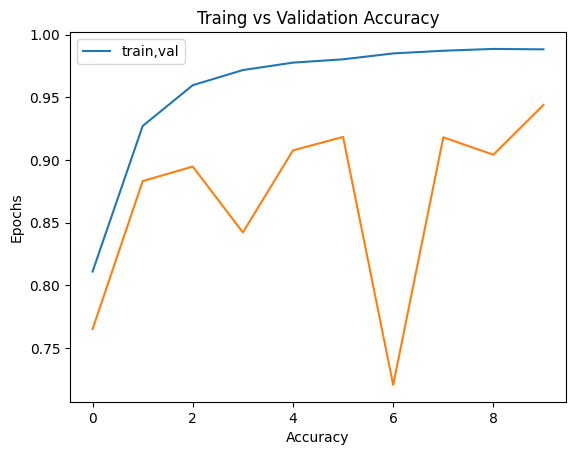

In [40]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Traing vs Validation Accuracy")
plt.legend(["train,val"])
plt.xlabel("Accuracy")
plt.ylabel("Epochs")

# Ensemble Methood

In [75]:
from tensorflow.keras.applications import ResNet50,DenseNet121
from tensorflow.keras.models import Model

In [76]:
from tensorflow.keras.layers import Input
input_1 = Input(shape=(256, 256, 3), name="input_resnet")
input_2 = Input(shape=(256, 256, 3), name="input_densenet")

In [ ]:
resnet = ResNet50(
    include_top=False,          # Don't include the final (1000-class) dense layer
    weights='imagenet',         # Use pretrained weights on ImageNet
    input_shape=(256, 256, 3))   # Match the target size from your data generator

desnet = DenseNet121(include_top=False,             # Desnet121 have 8M parameters
                       weights='imagenet',
                       input_shape=(256, 256, 3))

In [82]:
# Rename all layers to avoid name collision
for layer in resnet.layers:
    layer._name = "resnet_" + layer.name

for layer in desnet.layers:
    layer._name = "desnet_" + layer.name

In [83]:
resnet.trainable=False  # Freeze the convolutional base
desnet.trainable=False

In [88]:
# Extract Features
from tensorflow.keras.layers import GlobalAveragePooling2D
resnet_feat = GlobalAveragePooling2D(name="resnet_gap")(resnet.output)
desnet_feat = GlobalAveragePooling2D(name="desnet_gap")(desnet.output)

In [89]:
from tensorflow.keras.layers import Concatenate
merge = Concatenate(name="merged_features")([resnet_feat, desnet_feat])

In [90]:
merge = Concatenate()([resnet_feat, desnet_feat])
x = Dense(256)(merge)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Activation("relu")(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Activation("relu")(x)

output = Dense(train_data.num_classes,activation="softmax")(x)

model = Model(inputs=[resnet.input, desnet.input], outputs=output)
model.summary()

ValueError: The name "conv1_conv" is used 2 times in the model. All operation names should be unique.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(learning_Rate=0.0001),metrics=["accuracy"])

In [ ]:
model.fit(train_data,validation_data = validation_gen,epochs=10,callbacks=[checkpoint,early_stop])

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Traing vs Validation Accuracy")
plt.legend(["train,val"])
plt.xlabel("Accuracy")
plt.ylabel("Epochs")